In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pubplotlib as pplt

In [14]:
pplt.set_journal("aanda")

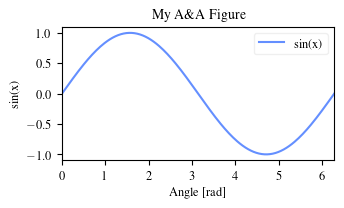

In [15]:
plt.figure(figsize=(pplt.onecol, pplt.onecol/pplt.golden))

x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

plt.plot(x, y, label='sin(x)')
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.title('My A\&A Figure')
plt.legend()

plt.show()

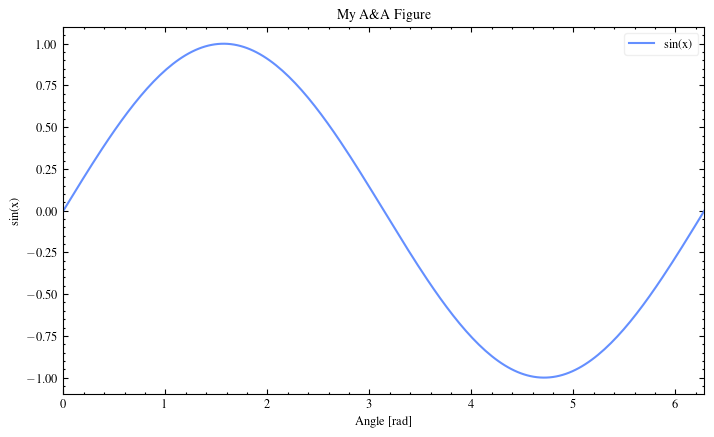

In [16]:
pplt.figure(twocols=True)

x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

plt.plot(x, y, label='sin(x)')
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.title('My A\&A Figure')
plt.legend()
pplt.set_ticks()

plt.show()

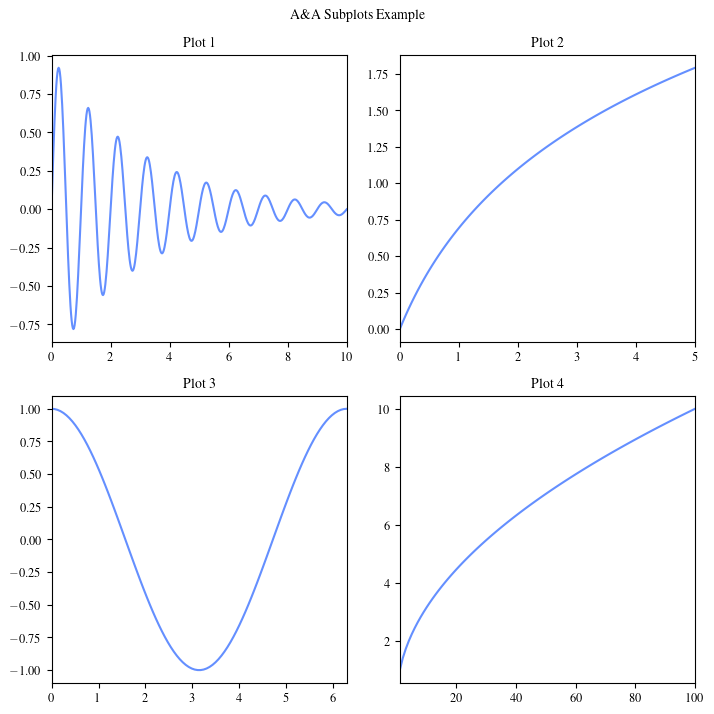

In [17]:
fig, ax = pplt.subplots(twocols=True, nrows=2, ncols=2, height_ratio=1)

fig.suptitle('A\&A Subplots Example')

x00 = np.linspace(0, 10,  500)
y00 = np.exp(-x00 / 3) * np.sin(2 * np.pi * x00)
ax[0, 0].plot(x00, y00)
ax[0, 0].set_title('Plot 1')

x01 = np.linspace(0, 5, 100)
y01 = np.log1p(x01)
ax[0, 1].plot(x01, y01)
ax[0, 1].set_title('Plot 2')

x10 = np.linspace(0, 2 * np.pi, 100)
y10 = np.cos(x10)
ax[1, 0].plot(x10, y10)
ax[1, 0].set_title('Plot 3')

x11 = np.linspace(1, 100, 100)
y11 = np.sqrt(x11)
ax[1, 1].plot(x11, y11)
ax[1, 1].set_title('Plot 4')

plt.show()

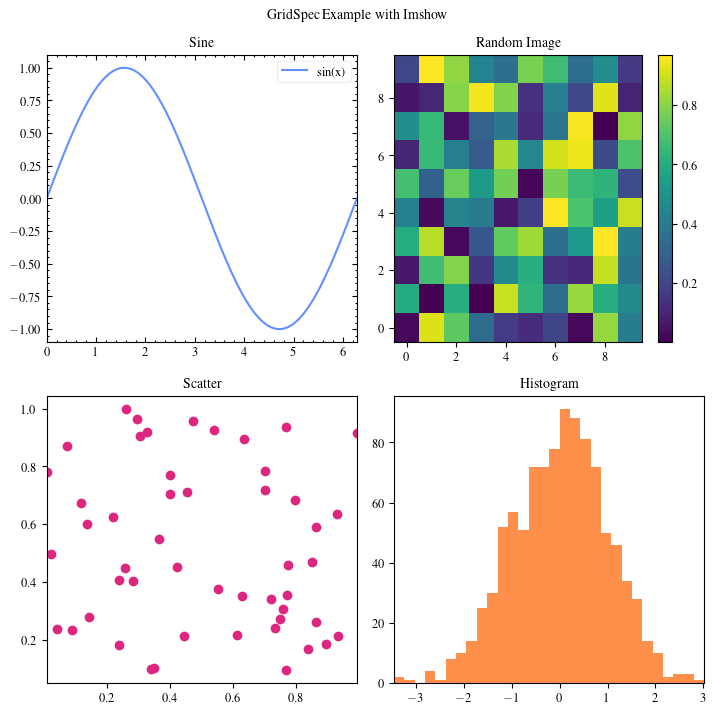

In [18]:
# Create figure with GridSpec
fig = pplt.figure(twocols=True, height_ratio=1)
gs = gridspec.GridSpec(2, 2, figure=fig)

# First subplot: line plot
ax1 = fig.add_subplot(gs[0, 0])
x = np.linspace(0, 2 * np.pi, 200)
ax1.plot(x, np.sin(x), label='sin(x)')
ax1.set_title('Sine')
ax1.legend()
pplt.set_ticks(ax1)

# Second subplot: imshow
ax2 = fig.add_subplot(gs[0, 1])
data = np.random.rand(10, 10)
im = ax2.imshow(data, cmap='viridis', aspect='auto')
ax2.set_title('Random Image')
fig.colorbar(im, ax=ax2)

# Third subplot: scatter
ax3 = fig.add_subplot(gs[1, 0])
ax3.scatter(np.random.rand(50), np.random.rand(50), c='C2')
ax3.set_title('Scatter')

# Fourth subplot: histogram
ax4 = fig.add_subplot(gs[1, 1])
ax4.hist(np.random.randn(1000), bins=30, color='C3', alpha=0.7)
ax4.set_title('Histogram')

fig.suptitle('GridSpec Example with Imshow')
plt.tight_layout()
plt.show()